<h1 style="color:red;text-align:center;">Employee Retention Report For Hr </h1>


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [19]:
df=pd.read_csv('hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
df.groupby('left').mean(numeric_only='True')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


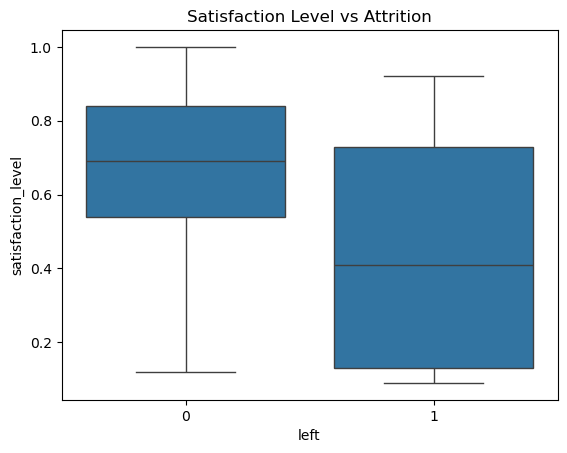

In [23]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction Level vs Attrition")
plt.show()

<h2 style="color:blue";> Satisfcation Level vs Attrition</h2>
<h3>from above grpah:-</h3>
--employees who left have lower statisfcation

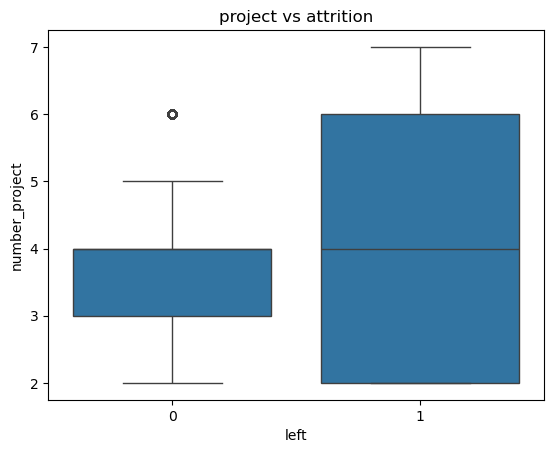

In [24]:
sns.boxplot(x='left',y='number_project',data=df)
plt.title("project vs attrition")
plt.show()

<h2 style="color:blue";> Projectvs Attrition</h2>
<h3>from above grpah:-</h3>
--employees who left have higher project count

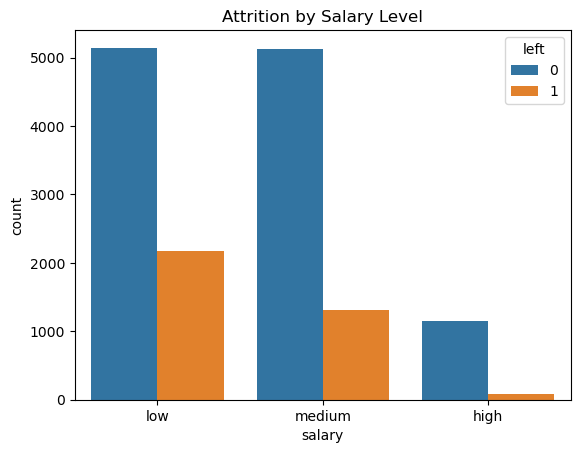

In [25]:
sns.countplot(x='salary', hue='left', data=df)
plt.title("Attrition by Salary Level")
plt.show()


<h2 style="color:Blue;">Here Most of the lefted employees have low salary</h2>

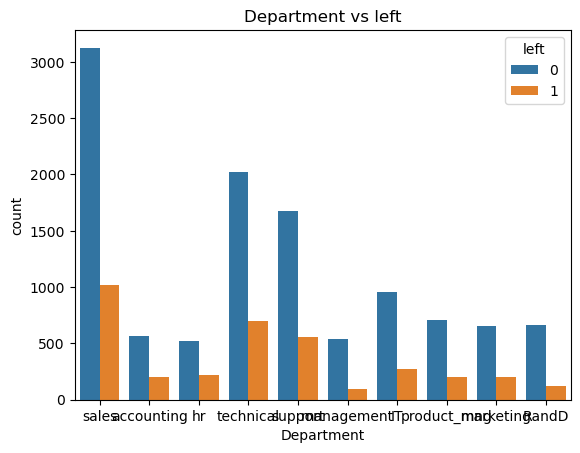

In [26]:
sns.countplot(x="Department",hue="left",data=df)
plt.title("Department vs left")
plt.show()

<p style="color:blue;">Most of the left employees are in sales departmment</p>


<Axes: xlabel='Department', ylabel='salary'>

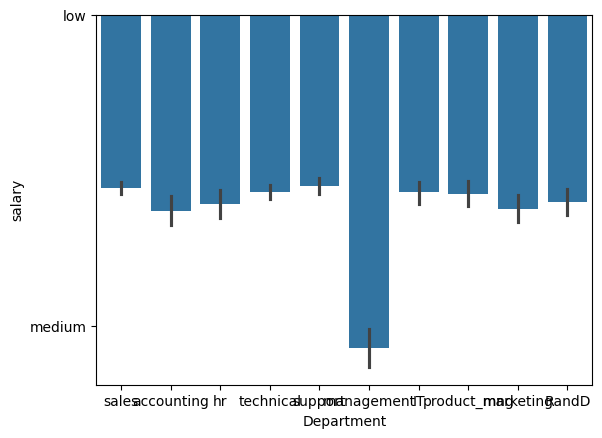

In [27]:
sns.barplot(x="Department",y="salary",data=df)

<h3 style="color:green;"> Factors affectig Retention of sales employees</h3>
<p style="color:red;">*Sales Department has most employees<br/>
*Sales department have lowest salary</p>

<h2 style="color:Blue;">Model For Predicitng Weather a Employee Will Leave or not</h2>

In [31]:
x=df[['satisfaction_level','number_project','average_montly_hours','Work_accident']]
y=df['left']
ob=LogisticRegression()
ob.fit(x,y)
sle=float(input("Enter stasfication level off employee"))
nop=float(input('Enter number of projects'))
avg=float(input('Enter avg monthly hrs'))
wo=float(input('Enter work accident'))
res=ob.predict([[sle,nop,avg,wo]])
print("Prediction (1 = Left, 0 = Stayed):", res[0])
if res < 0.5:
    print("Employee  may like to stay")
elif res >= 0.5:
    print("Employee may like to left")

Enter stasfication level off employee 0.2
Enter number of projects 5
Enter avg monthly hrs 400
Enter work accident 1


Prediction (1 = Left, 0 = Stayed): 0
Employee  may like to stay


C:\Users\bmsha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h2 style="color:green;">Accuracy of the model</h2>

In [32]:
xtr,xte,ytr,ytes=train_test_split(x,y,test_size=0.2,random_state=40)
ob.fit(xtr,ytr)
from sklearn.metrics import accuracy_score

In [33]:
ypred=ob.predict(xte)
accuracyy=accuracy_score(ytes,ypred)
print('accuracy=',accuracyy)

accuracy= 0.7733333333333333


<h1 style="color:red">Conclusion</h1>
<p style="color:blue;">-- Most of The left employees have lower satisificaton<br/>
--Most of the left employees have higher work pressure due to more project works<br/>
--Most of the left employees have low salary<br/>
--do something to encourage sales department like insentive for extra hrs<br/>
</p>